<a href="https://colab.research.google.com/github/mrsaurabhtanwer/Flight_Booking_Price_Prediction/blob/main/Flight_Booking_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading Dataset

In [2]:
df=pd.read_csv("/content/Flight_Booking.csv")

In [3]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df=df.drop(columns=["Unnamed: 0"]) # drop unncessary columns

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.shape

(300153, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


find missing values/ null values

In [9]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


Data Visualization

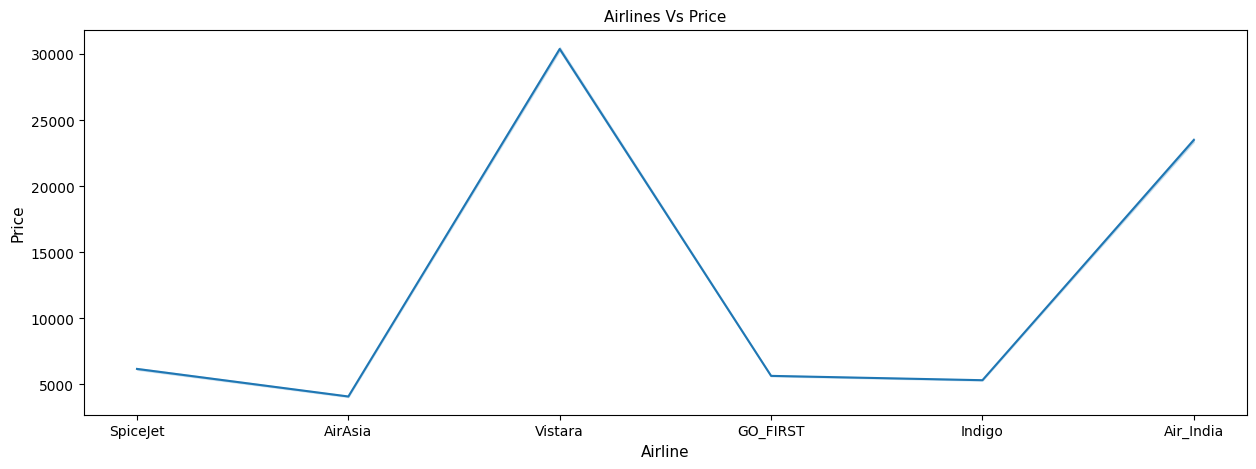

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=11)
plt.xlabel('Airline',fontsize=11)
plt.ylabel('Price',fontsize=11)
plt.show()

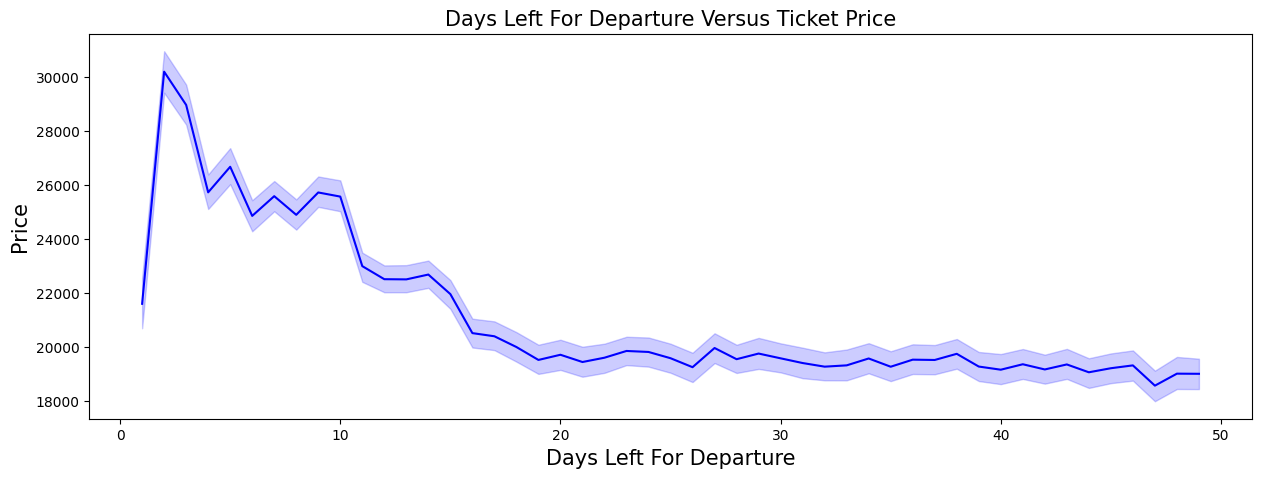

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left For Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

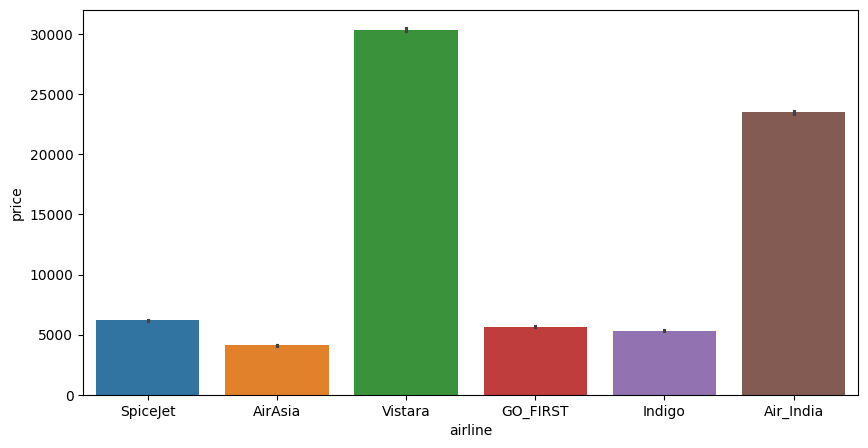

In [12]:
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df,hue='airline')

<Axes: xlabel='class', ylabel='price'>

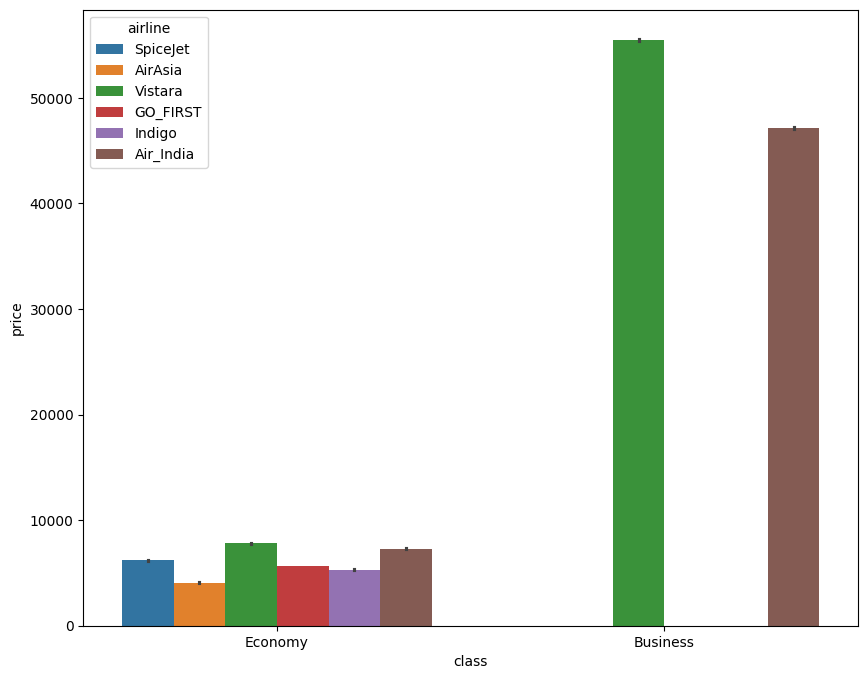

In [13]:
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price',data=df,hue='airline')

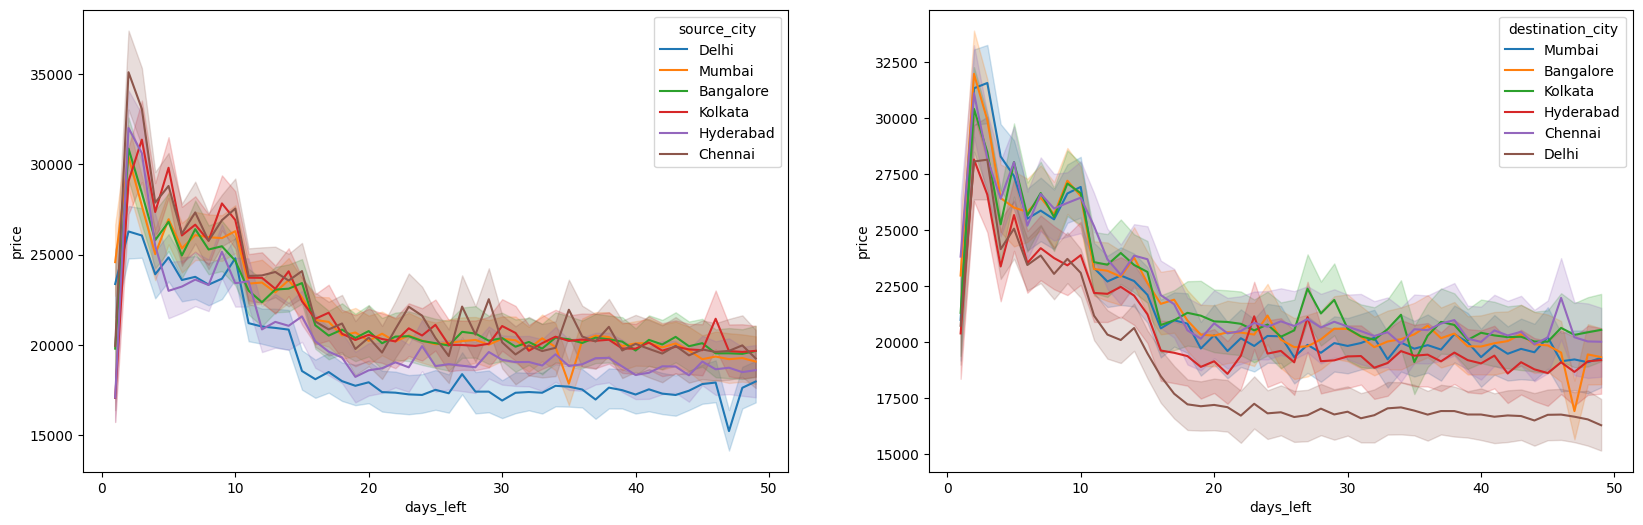

In [14]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

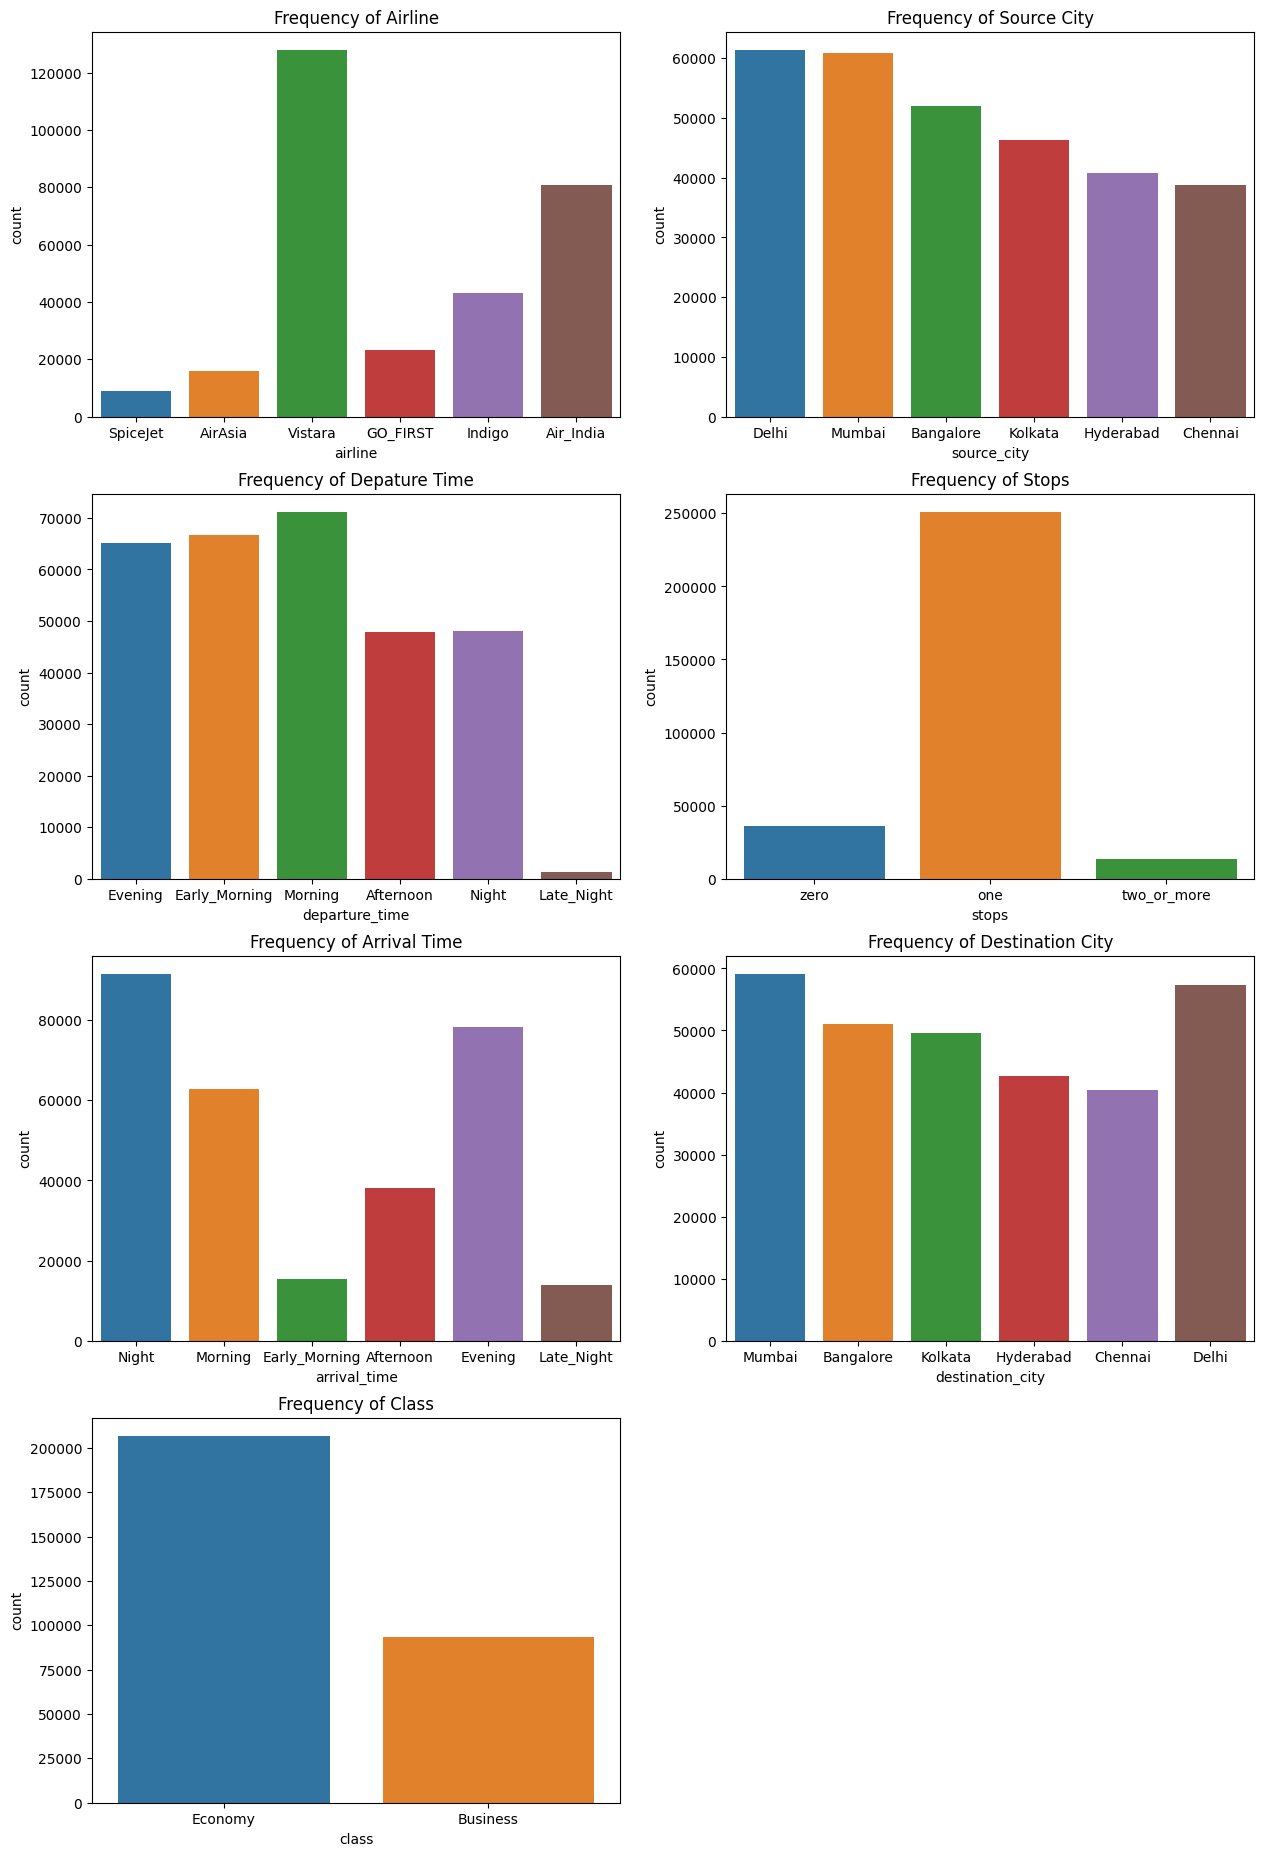

In [15]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df["airline"], data=df,hue='airline')
plt.title("Frequency of Airline")

plt.subplot(4,2,2)
sns.countplot(x=df["source_city"],data=df,hue='source_city')
plt.title("Frequency of Source City")

plt.subplot(4,2,3)
sns.countplot(x=df["departure_time"],data=df,hue='departure_time')
plt.title("Frequency of Depature Time")

plt.subplot(4,2,4)
sns.countplot(x=df["stops"],data=df,hue='stops')
plt.title("Frequency of Stops")

plt.subplot(4,2,5)
sns.countplot(x=df["arrival_time"],data=df,hue='arrival_time')
plt.title("Frequency of Arrival Time")

plt.subplot(4,2,6)
sns.countplot(x=df["destination_city"],data=df,hue='destination_city')
plt.title("Frequency of Destination City")

plt.subplot(4,2,7)
sns.countplot(x=df["class"],data=df,hue='class')
plt.title("Frequency of Class")

plt.show()

Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["stops"]=le.fit_transform(df["stops"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


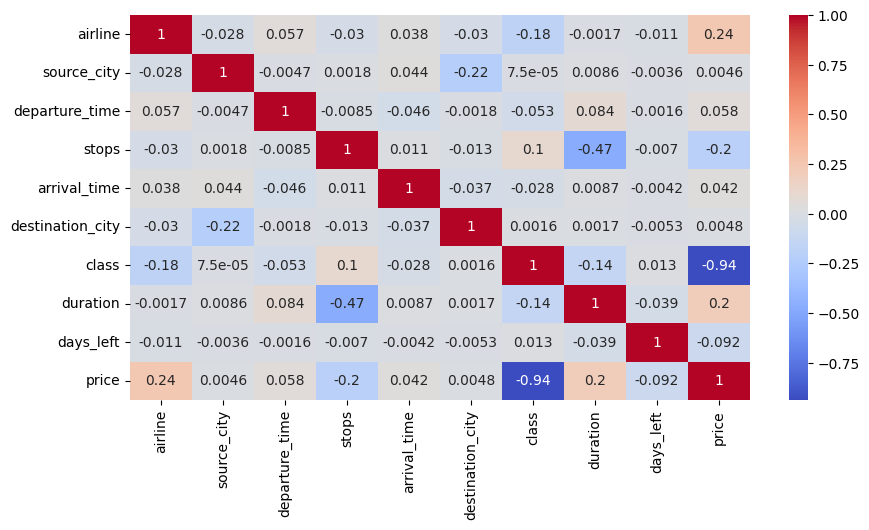

In [17]:
plt.figure(figsize=(10,5))
# Drop the 'flight' column before calculating correlation
sns.heatmap(df.drop(columns=['flight']).corr(),annot=True,cmap="coolwarm")
plt.show()

**Feature Selection**

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype!='object') & (col !='price') & (col !='flight')):
    col_list.append(col)

X= df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                         for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [25]:
df=df.drop(columns=["stops"])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list =[]
for col in df.columns:
  if ((df[col].dtype != 'object')&(col !='price')):
    col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                         for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


**Linear Regression**

Applying standardization and implementing Linear Regression Model to
predict the price of a flight.

In [29]:
X =df.drop(columns=["price", "flight"])
y= df["price"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_Value","Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE)
of the Linear regression model is 7259.93 and Mean absolute percentage
error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

np.float64(7259.934664536733)

Plotting the graph of actual
and predicted price of flight

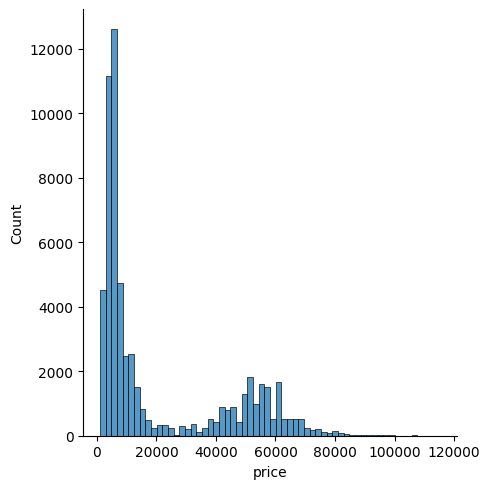

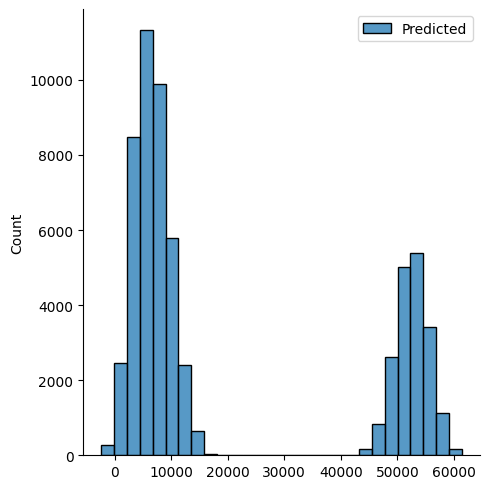

In [42]:
sns.displot(y_test,label='Actual')
sns.displot(y_pred,label='Predicted')
plt.legend()
plt.show()

**Decision Tree Regressor**

Mean absolute percentage
error is 7.7 percent and RMSE
is 3620 which is less than the
linear regression model

In [43]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

np.float64(3609.981049739921)

**Random Forest Regessor**

Mean absolute percentage
error is 7.3 percent and RMSE
is 2824 which is less than the
linear regression and decision
tree model

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error


np.float64(2830.339695186479)

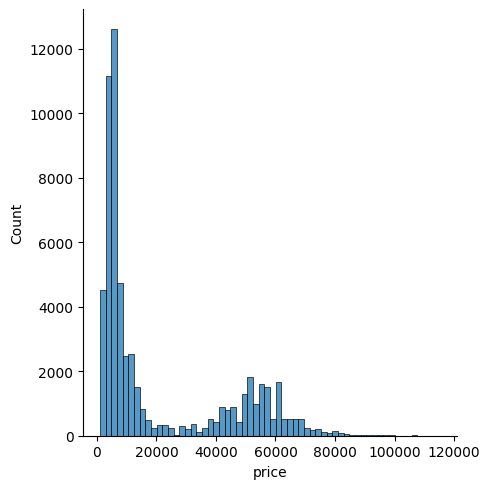

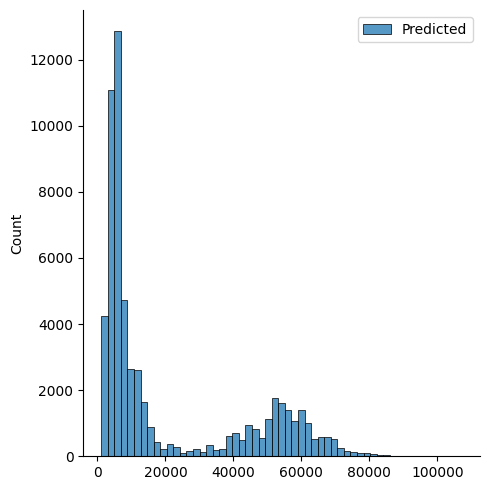

In [45]:
sns.displot(y_test,label="Actual")
sns.displot(y_pred,label="Predicted")
plt.legend()